In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

/Users/michelpenke/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


API keys can be found here: https://twelvedata.com/account/api-keys

In [2]:
# Set up parameters for the data request
symbol = "^DJI"  # Dow Jones Industrial Average symbol
interval = "1h"
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

[*********************100%***********************]  1 of 1 completed

Price                   Datetime     Adj Close         Close          High  \
Ticker                                    ^DJI          ^DJI          ^DJI   
28     2024-11-04 16:30:00+00:00  41822.878906  41822.878906  41853.929688   
29     2024-11-04 17:30:00+00:00  41845.468750  41845.468750  41884.250000   
30     2024-11-04 18:30:00+00:00  41807.648438  41807.648438  41865.699219   
31     2024-11-04 19:30:00+00:00  41813.808594  41813.808594  41853.000000   
32     2024-11-04 20:30:00+00:00  41799.820312  41799.820312  41821.859375   

Price            Low          Open    Volume  
Ticker          ^DJI          ^DJI      ^DJI  
28      41647.300781  41852.089844  37653449  
29      41773.289062  41823.171875  27635308  
30      41806.820312  41845.269531  25041370  
31      41791.648438  41806.828125  24867875  
32      41761.171875  41814.261719  43654969  


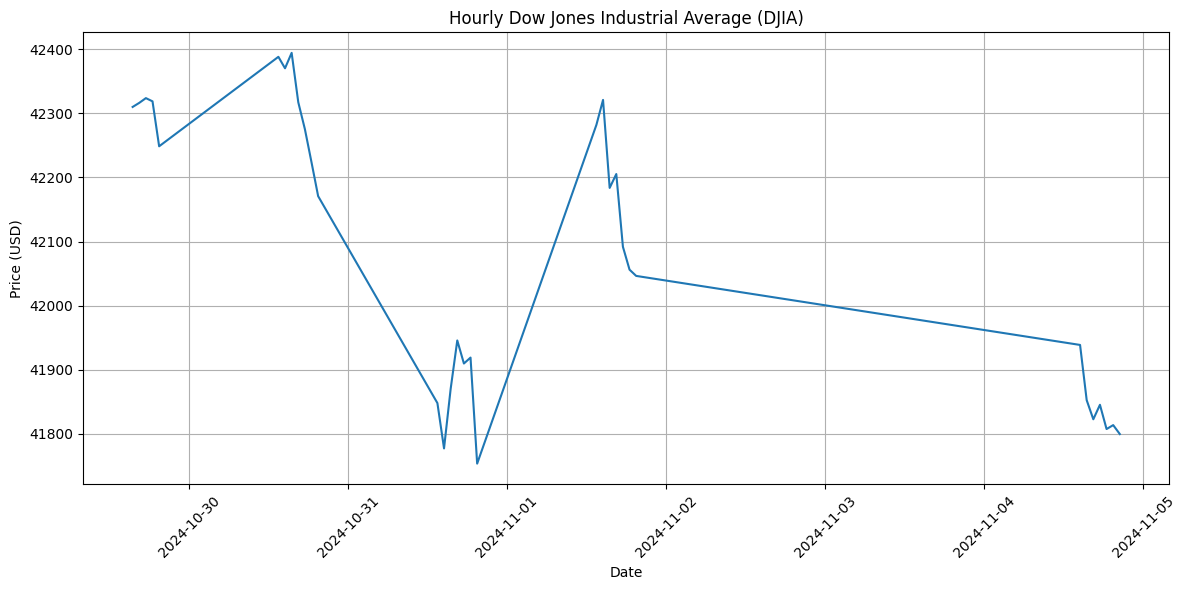


Current value: Ticker
^DJI    41799.820312
Name: 32, dtype: float64
Highest value: Ticker
^DJI    42457.921875
dtype: float64
Lowest value: Ticker
^DJI    41647.300781
dtype: float64
Average value: Ticker
^DJI    42083.194721
dtype: float64


In [3]:
# Fetch data using yfinance
df = yf.download(symbol, start=start_date, end=end_date, interval=interval)

if not df.empty:
    # Reset index to make datetime a column
    df = df.reset_index()
    
    print(df.tail())

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df["Datetime"], df["Close"])
    plt.title(f'Hourly Dow Jones Industrial Average (DJIA)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"\nCurrent value: {df['Close'].iloc[-1]}")
    print(f"Highest value: {df['High'].max()}")
    print(f"Lowest value: {df['Low'].min()}")
    print(f"Average value: {df['Close'].mean()}")


else:
    print("No data found for the specified period")